## Fire Likelihood Model

### Author: Ryan Gan

### Date Created: 2018-07-02


Running a prediction model to estimate the likelihood of a fire, given predictors.

Loading pandas, numpy, and sci-kit learn.

In [16]:
# import modules
import pandas as pd
import numpy as np
# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib as plt
import seaborn as sns

Importing fire data and doing some transformations.

In [3]:
# import fire predictor
fires = pd.read_csv('../data/model_data/1979-2016_fire_likelihood.csv', index_col=0)
# change date to datetime
fires['date'] = pd.to_datetime(fires['date'])
# category types
fires['state'] = fires['state'].astype('category')
fires['month'] = fires['month'].astype('category')
fires['grid_id'] = fires['grid_id'].astype('category')

In [11]:
# check types
fires.dtypes

grid_id                     int64
glon                      float64
glat                      float64
date               datetime64[ns]
temp_c                    float64
temp_c_lag1               float64
temp_c_lag2               float64
temp_c_lag3               float64
temp_c_lag4               float64
temp_c_lag5               float64
temp_c_lag6               float64
temp_c_lag7               float64
temp_c_lag8               float64
temp_c_lag9               float64
temp_c_lag10              float64
temp_c_lag11              float64
temp_c_lag12              float64
prec_kgm2                 float64
prec_kgm2_lag1            float64
prec_kgm2_lag2            float64
prec_kgm2_lag3            float64
prec_kgm2_lag4            float64
prec_kgm2_lag5            float64
prec_kgm2_lag6            float64
prec_kgm2_lag7            float64
prec_kgm2_lag8            float64
prec_kgm2_lag9            float64
prec_kgm2_lag10           float64
prec_kgm2_lag11           float64
prec_kgm2_lag1

In [36]:
# subset predictor X and y
X = fires.loc[:, 'glon':'rhum_perc_lag12']
X = X.drop(['date'], axis=1)
y = fires['fire']

In [37]:
X.head()

,glon,glat,temp_c,temp_c_lag1,temp_c_lag2,temp_c_lag3,temp_c_lag4,temp_c_lag5,temp_c_lag6,temp_c_lag7,...,rhum_perc_lag3,rhum_perc_lag4,rhum_perc_lag5,rhum_perc_lag6,rhum_perc_lag7,rhum_perc_lag8,rhum_perc_lag9,rhum_perc_lag10,rhum_perc_lag11,rhum_perc_lag12
162,-81.0,26.0,-18.788806,-16.159675,-7.296191,2.417532,8.361591,15.682034,16.000754,11.015319,...,90.753142,83.428592,75.072065,81.675348,89.171776,92.718176,87.274646,81.542242,82.219075,81.685162
203,-99.0,27.0,-20.508847,-13.985495,-8.053777,7.436029,14.670534,19.032485,19.820216,16.811469,...,75.026149,67.544186,58.876761,65.171682,70.389516,79.374292,90.496616,94.039756,96.459128,97.613157
204,-98.0,27.0,-20.521859,-14.407123,-8.072947,7.352575,14.725565,19.035636,19.757214,16.599985,...,76.887096,67.833977,60.324305,66.236394,71.497022,79.880936,91.262585,94.620598,97.272705,97.959056
220,-82.0,27.0,-18.885295,-16.361459,-7.539416,2.445251,8.592806,15.635160,16.022770,10.947775,...,91.153650,83.243989,75.582409,81.639409,89.299014,92.743060,87.588324,82.729815,82.547024,83.133142
221,-81.0,27.0,-18.788806,-16.159675,-7.296191,2.417532,8.361591,15.682034,16.000754,11.015319,...,90.753142,83.428592,75.072065,81.675348,89.171776,92.718176,87.274646,81.542242,82.219075,81.685162


### Distributions Summary Statistics

Checking mean of fires. Since fires is a 1 (yes) / 0 (no) variable which should be the percentage of grid cells that had a fire over the season.

In [38]:
# before I split I want to understand my distributions of my predictors
y.mean()

0.13658612342822868

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0cac429b0>,
      dtype=object)

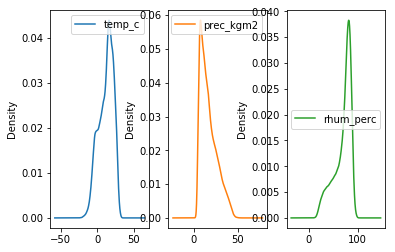

In [26]:
# distribution plot of temp_celcius
X[['temp_c', 'prec_kgm2', 'rhum_perc']].plot(kind='density', subplots = True,
                                             layout = (1, 3), sharex = False)

### Train / Test Split

Shuffling and splitting X and Y in to test and train.

In [39]:
X, y = shuffle(X, y, random_state = 123)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 321)

Checking test/train y and predictors.

In [41]:
# check y
print(y_test.mean(), y_train.mean())

0.13816592763961186 0.1360595220244343


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0cab38be0>,
      dtype=object)

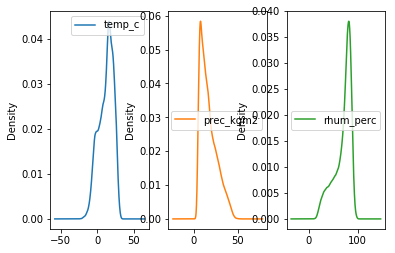

In [27]:
# check x distributions X train
# distribution plot of temp_celcius
X_train[['temp_c', 'prec_kgm2', 'rhum_perc']].plot(kind='density', subplots = True,
                                             layout = (1, 3), sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0cab4e0f0>,
      dtype=object)

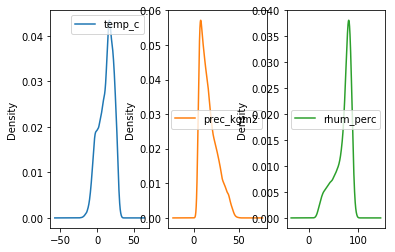

In [28]:
# distribution plot of X test
X_test[['temp_c', 'prec_kgm2', 'rhum_perc']].plot(kind='density', subplots = True,
                                             layout = (1, 3), sharex = False)

Split looks good.

### Logistic on Train

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# predic y 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [44]:
logreg.predict_proba(X_test)[:10]

array([[0.99316012, 0.00683988],
       [0.95210361, 0.04789639],
       [0.9273675 , 0.0726325 ],
       [0.75131884, 0.24868116],
       [0.60840975, 0.39159025],
       [0.9173669 , 0.0826331 ],
       [0.92802674, 0.07197326],
       [0.96668642, 0.03331358],
       [0.95306292, 0.04693708],
       [0.80494374, 0.19505626]])

In [45]:
y_test[:10]

515039    0.0
608279    0.0
178619    0.0
653975    0.0
268114    1.0
527091    0.0
437584    0.0
89888     0.0
436819    0.0
268175    0.0
Name: fire, dtype: float64

Accuracy not bad for a simple logistic model.